<h2 style="color:green"> IMPORT LIBRARIES </h2>

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import pearsonr

<h2 style="color:green"> IMPORT DATASET </h2>

In [133]:
import pandas as pd
data=pd.read_csv("file:///C:/Users/bhava/Downloads/imports-85.data",header=None,names=["symboling","normalized_losses","make","fuel_type","aspiration","num_of_doors","body_style","drive_wheels","engine_location","wheel_base","length","width","height","curb_weight","engine_type","num_of_cylinders","engine_size","fuel_system","bore","stroke","compression_ratio","horsepower","peak_rpm","city_mpg","highway_mpg","price"],na_values="?")
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [3]:
data.tail()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


<h2 style="color:green"> CHECK SHAPE </h2>

In [4]:
data.shape

(205, 26)

<h2 style="color:green"> CKECK DATATYPE </h2>

In [5]:
data.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

<h2 style="color:green"> CHECK FOR NULL VALUES </h2>
<h4 style="color:green">FOR CONTINUOUS DATA 1)If it has null-fill or replace the data
2)If it has outlier fill with median
3)If it hasn't outlier fill with mean</h4>
<h4 style="color:green">FOR DISCRETE DATA 1)If it has null-fill or replace the data with mode
</h4>

In [6]:
data.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

<h2 style="color:green"> DISCRETE DATAS-describe,valuecount,countplot</h2>
<h5 style="color:blue"> "symboling","make","fuel_type","aspiration","num_of_doors","body_style","drive_wheels","engine_location","engine_type","num_of_cylinders","engine_size","fuel_system" </h5>
<h2 style="color:green"> CONTINUOUS DATAS-boxplot,histogram,shapiro </h2>
<h5 style="color:blue"> "normalized_losses","wheel_base","length","width","height","curb_weight","bore","stroke","compression_ratio","horsepower","peak_rpm","city_mpg","highway_mpg","price"
</h5>

In [7]:
data.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

<AxesSubplot:xlabel='symboling', ylabel='count'>

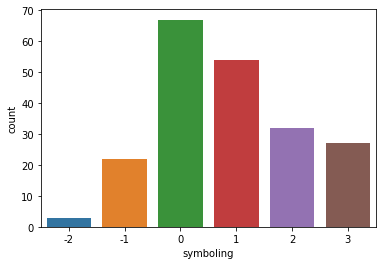

In [8]:
sns.countplot(x="symboling",data=data)

<AxesSubplot:xlabel='symboling', ylabel='count'>

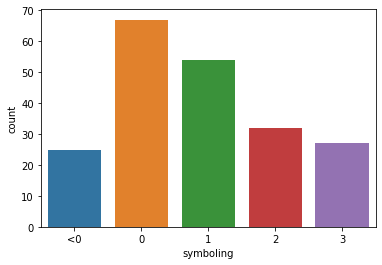

In [9]:
data.symboling=data.symboling.replace([-2,-1],"<0")
sns.countplot(x="symboling",data=data,order=["<0",0,1,2,3])

{'whiskers': [<matplotlib.lines.Line2D at 0x19cc60521c0>,
 'caps': [<matplotlib.lines.Line2D at 0x19cc6052820>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cc6042d00>],
 'medians': [<matplotlib.lines.Line2D at 0x19cc6052f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cc605f310>],
 'means': []}

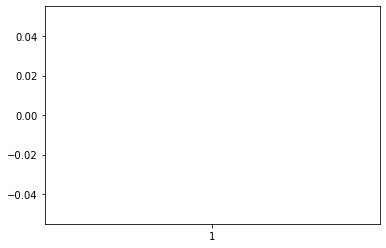

In [10]:
plt.boxplot(data.normalized_losses)

In [11]:
data.normalized_losses.describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized_losses, dtype: float64

In [12]:
data.normalized_losses.fillna(data.normalized_losses.median(),inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x19cc60b9bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x19cc60c5310>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cc60b9820>],
 'medians': [<matplotlib.lines.Line2D at 0x19cc60c5a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cc60c5dc0>],
 'means': []}

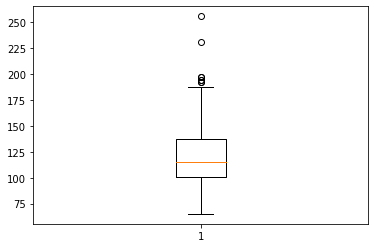

In [13]:
plt.boxplot(data.normalized_losses)

(array([17., 46., 72., 20., 21., 18.,  9.,  0.,  1.,  1.]),
 array([ 65. ,  84.1, 103.2, 122.3, 141.4, 160.5, 179.6, 198.7, 217.8,
        236.9, 256. ]),
 <BarContainer object of 10 artists>)

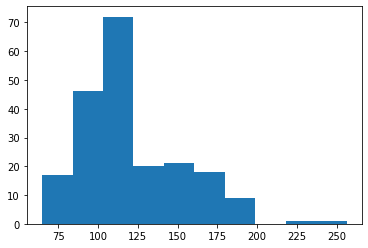

In [14]:
plt.hist(data.normalized_losses)

In [15]:
stats.shapiro(data.normalized_losses)

ShapiroResult(statistic=0.9371652007102966, pvalue=9.691518698673462e-08)

In [16]:
data.make.describe()

count        205
unique        22
top       toyota
freq          32
Name: make, dtype: object

In [17]:
data.make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

<AxesSubplot:xlabel='make', ylabel='count'>

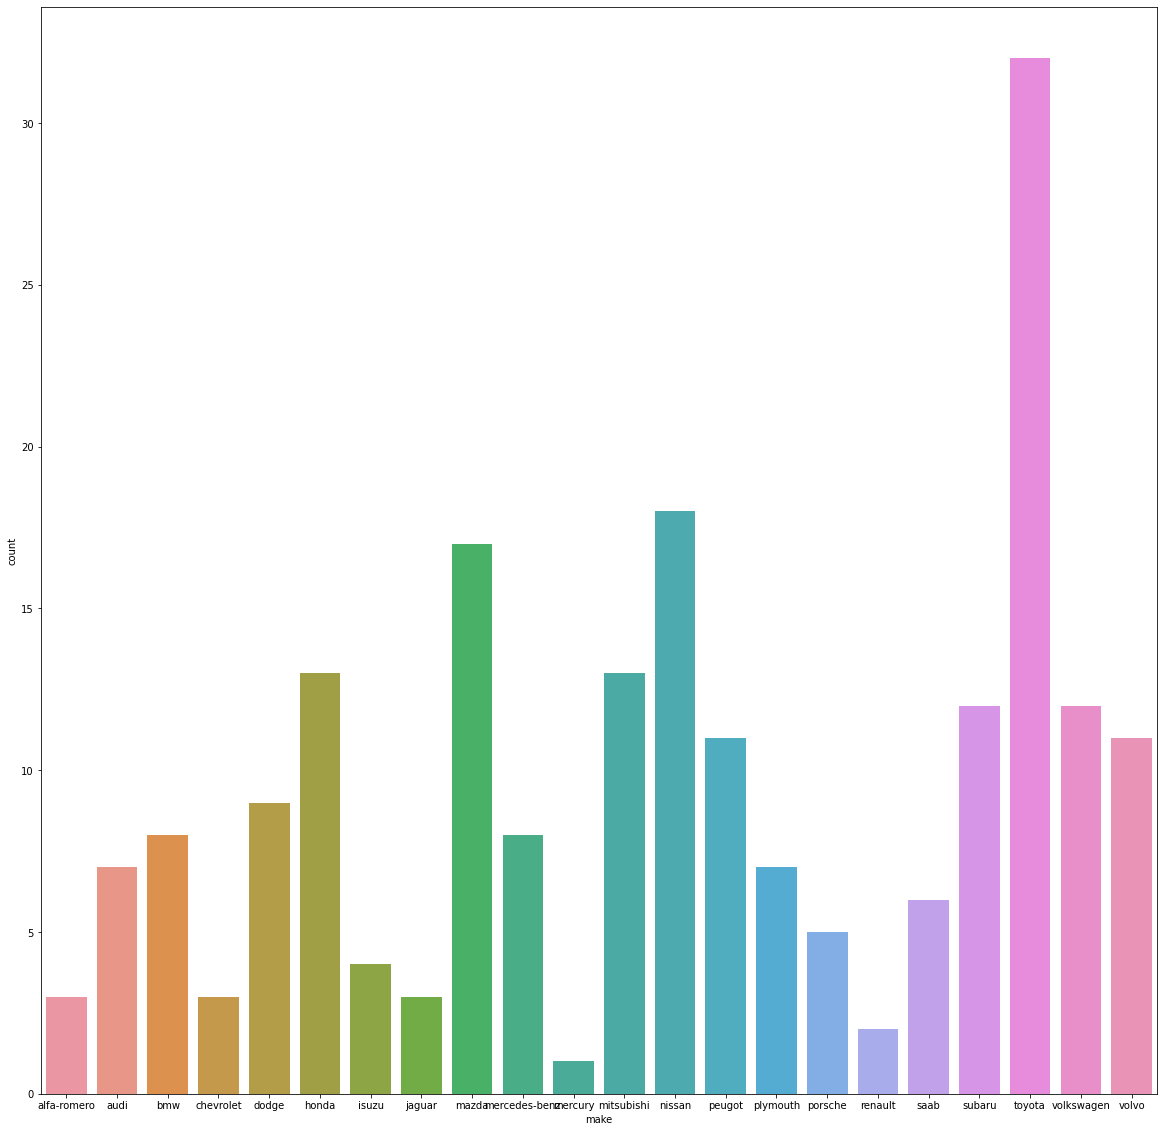

In [18]:
plt.figure(figsize=(20,20))
sns.countplot(x="make",data=data)

In [19]:
data.fuel_type.describe()


count     205
unique      2
top       gas
freq      185
Name: fuel_type, dtype: object

<AxesSubplot:xlabel='fuel_type', ylabel='count'>

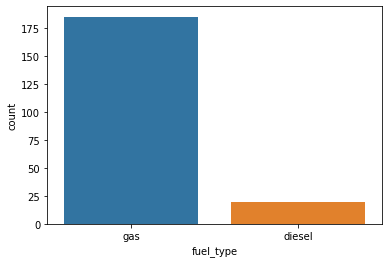

In [20]:
sns.countplot(x="fuel_type",data=data)

In [21]:
data.aspiration.describe()

count     205
unique      2
top       std
freq      168
Name: aspiration, dtype: object

In [22]:
data.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

<AxesSubplot:xlabel='aspiration', ylabel='count'>

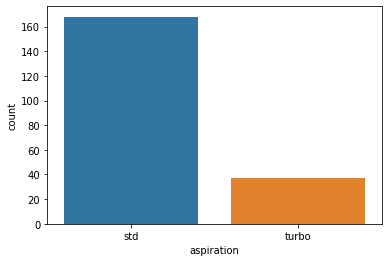

In [23]:
sns.countplot(x="aspiration",data=data)

In [24]:
data.num_of_doors.describe()

count      203
unique       2
top       four
freq       114
Name: num_of_doors, dtype: object

In [25]:
data.num_of_doors.fillna("four",inplace=True)

<AxesSubplot:xlabel='num_of_doors', ylabel='count'>

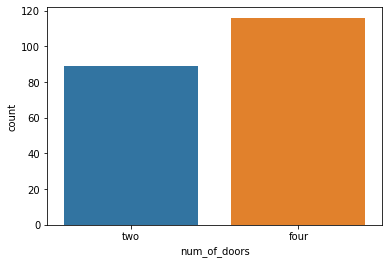

In [26]:
sns.countplot(x="num_of_doors",data=data)

In [27]:
data.body_style.describe()

count       205
unique        5
top       sedan
freq         96
Name: body_style, dtype: object

In [28]:
data.body_style.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64

<AxesSubplot:xlabel='body_style', ylabel='count'>

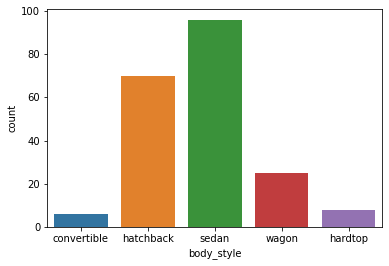

In [29]:
sns.countplot(x="body_style",data=data)

In [30]:
data.drive_wheels.describe()

count     205
unique      3
top       fwd
freq      120
Name: drive_wheels, dtype: object

In [31]:
data.drive_wheels.value_counts()

fwd    120
rwd     76
4wd      9
Name: drive_wheels, dtype: int64

<AxesSubplot:xlabel='drive_wheels', ylabel='count'>

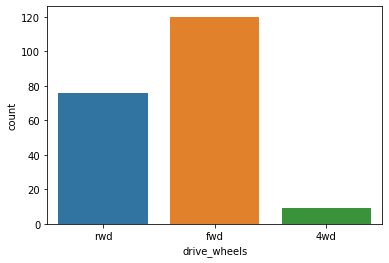

In [32]:
sns.countplot(x="drive_wheels",data=data)

In [33]:
data.engine_location.describe()

count       205
unique        2
top       front
freq        202
Name: engine_location, dtype: object

In [34]:
data.engine_location.value_counts()

front    202
rear       3
Name: engine_location, dtype: int64

<AxesSubplot:xlabel='engine_location', ylabel='count'>

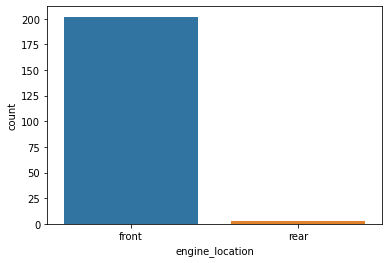

In [35]:
sns.countplot(x="engine_location",data=data)

{'whiskers': [<matplotlib.lines.Line2D at 0x19cc776c2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x19cc767dfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cc7749eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x19cc73dd730>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cc74c51c0>],
 'means': []}

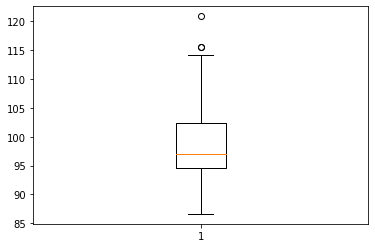

In [134]:
plt.boxplot(data.wheel_base)

In [37]:
data.wheel_base.describe()

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheel_base, dtype: float64

(array([ 8.,  9., 83., 42., 24., 14., 15.,  3.,  6.,  1.]),
 array([ 86.6 ,  90.03,  93.46,  96.89, 100.32, 103.75, 107.18, 110.61,
        114.04, 117.47, 120.9 ]),
 <BarContainer object of 10 artists>)

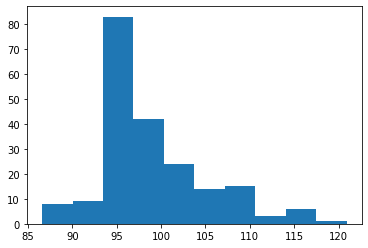

In [38]:
plt.hist(data.wheel_base)

In [39]:
stats.shapiro(data.wheel_base)

ShapiroResult(statistic=0.9115860462188721, pvalue=1.0368441660801864e-09)

In [40]:
data.length.describe()

count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: length, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x19cc75849d0>,
 'caps': [<matplotlib.lines.Line2D at 0x19cc75900d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cc7584640>],
 'medians': [<matplotlib.lines.Line2D at 0x19cc75907f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cc7590b80>],
 'means': []}

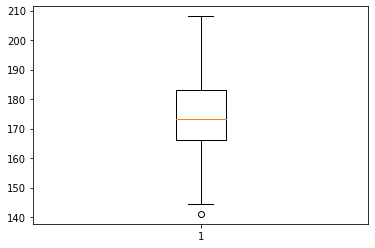

In [41]:
plt.boxplot(data.length)

(array([ 3.,  3., 29., 23., 54., 39., 23., 20.,  8.,  3.]),
 array([141.1, 147.8, 154.5, 161.2, 167.9, 174.6, 181.3, 188. , 194.7,
        201.4, 208.1]),
 <BarContainer object of 10 artists>)

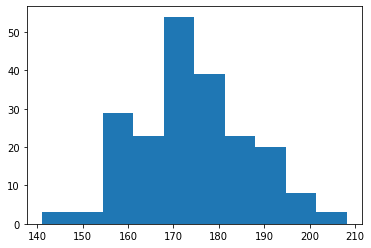

In [42]:
plt.hist(data.length)

In [43]:
stats.shapiro(data.length)

ShapiroResult(statistic=0.9820953607559204, pvalue=0.01036272943019867)

In [44]:
data.width.describe()

count    205.000000
mean      65.907805
std        2.145204
min       60.300000
25%       64.100000
50%       65.500000
75%       66.900000
max       72.300000
Name: width, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x19cc7672850>,
 'caps': [<matplotlib.lines.Line2D at 0x19cc7672f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cc76724c0>],
 'medians': [<matplotlib.lines.Line2D at 0x19cc767d670>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cc767da00>],
 'means': []}

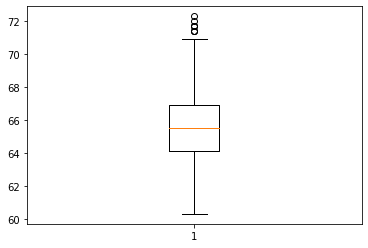

In [45]:
plt.boxplot(data.width)

(array([ 1.,  2., 36., 39., 44., 42., 20.,  7.,  6.,  8.]),
 array([60.3, 61.5, 62.7, 63.9, 65.1, 66.3, 67.5, 68.7, 69.9, 71.1, 72.3]),
 <BarContainer object of 10 artists>)

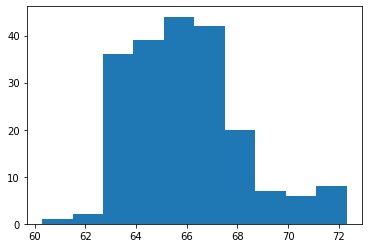

In [46]:
plt.hist(data.width)

In [47]:
stats.shapiro(data.width)

ShapiroResult(statistic=0.9210780262947083, pvalue=5.012857240416224e-09)

In [48]:
data.height.describe()

count    205.000000
mean      53.724878
std        2.443522
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: height, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x19cc7758460>,
 'caps': [<matplotlib.lines.Line2D at 0x19cc7758b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cc77580d0>],
 'medians': [<matplotlib.lines.Line2D at 0x19cc77642e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cc7764670>],
 'means': []}

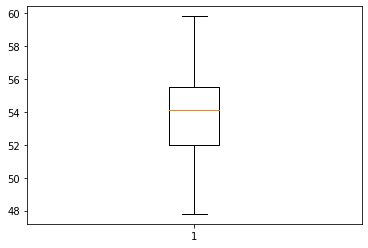

In [49]:
plt.boxplot(data.height)

In [50]:
stats.shapiro(data.height)

ShapiroResult(statistic=0.9842321276664734, pvalue=0.021682262420654297)

In [51]:
data.curb_weight.describe()

count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curb_weight, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x19cc77b8e50>,
 'caps': [<matplotlib.lines.Line2D at 0x19cc77c95e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cc77b8a90>],
 'medians': [<matplotlib.lines.Line2D at 0x19cc77c9ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cc77d7070>],
 'means': []}

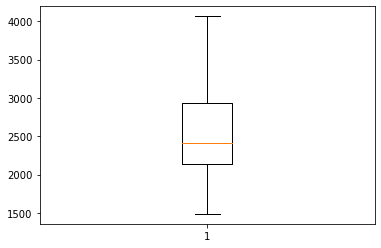

In [52]:
plt.boxplot(data.curb_weight)

(array([ 2., 29., 33., 50., 25., 23., 26.,  8.,  5.,  4.]),
 array([1488. , 1745.8, 2003.6, 2261.4, 2519.2, 2777. , 3034.8, 3292.6,
        3550.4, 3808.2, 4066. ]),
 <BarContainer object of 10 artists>)

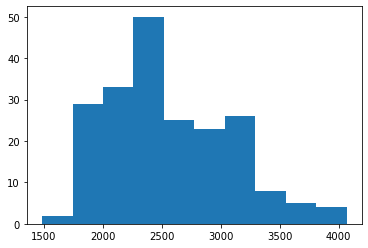

In [53]:
plt.hist(data.curb_weight)

In [54]:
stats.shapiro(data.curb_weight)

ShapiroResult(statistic=0.9530424475669861, pvalue=2.8916113024024526e-06)

In [55]:
data.engine_type.describe()

count     205
unique      7
top       ohc
freq      148
Name: engine_type, dtype: object

In [56]:
data.engine_type.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine_type, dtype: int64

<AxesSubplot:xlabel='engine_type', ylabel='count'>

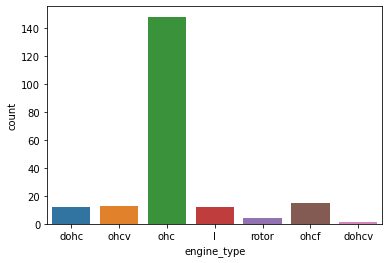

In [57]:
sns.countplot(x="engine_type",data=data)

In [58]:
data.num_of_cylinders.describe()

count      205
unique       7
top       four
freq       159
Name: num_of_cylinders, dtype: object

In [59]:
data.num_of_cylinders.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

<AxesSubplot:xlabel='num_of_cylinders', ylabel='count'>

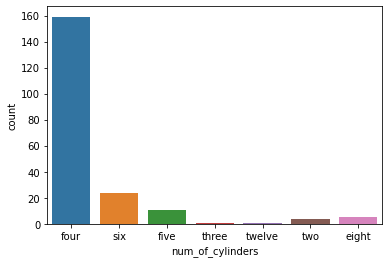

In [60]:
sns.countplot(x="num_of_cylinders",data=data)

<AxesSubplot:xlabel='num_of_cylinders', ylabel='count'>

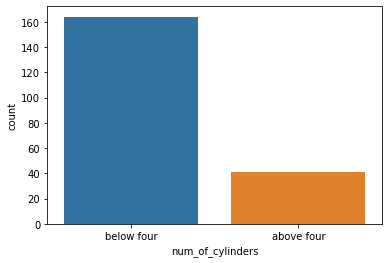

In [61]:
data.num_of_cylinders=data.num_of_cylinders.replace(["two","three","four"],"below four")
data.num_of_cylinders=data.num_of_cylinders.replace(["five","six","eight","twelve"],"above four")
sns.countplot(x="num_of_cylinders",data=data,order=["below four","above four"])

In [62]:
data.engine_size.describe()

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine_size, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x19cc79de7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x19cc79def10>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cc79de490>],
 'medians': [<matplotlib.lines.Line2D at 0x19cc7f3a670>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cc7f3aa00>],
 'means': []}

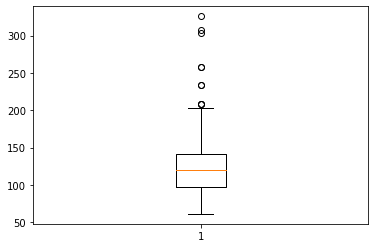

In [63]:
plt.boxplot(data.engine_size)

(array([ 6., 95., 46., 30., 14.,  7.,  2.,  2.,  0.,  3.]),
 array([ 61. ,  87.5, 114. , 140.5, 167. , 193.5, 220. , 246.5, 273. ,
        299.5, 326. ]),
 <BarContainer object of 10 artists>)

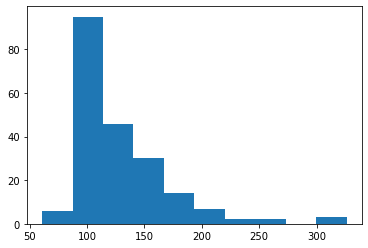

In [64]:
plt.hist(data.engine_size)

In [65]:
stats.shapiro(data.engine_size)

ShapiroResult(statistic=0.8294388651847839, pvalue=3.0569154792128156e-14)

In [66]:
data.fuel_system.describe()

count      205
unique       8
top       mpfi
freq        94
Name: fuel_system, dtype: object

In [67]:
data.fuel_system.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel_system, dtype: int64

<AxesSubplot:xlabel='fuel_system', ylabel='count'>

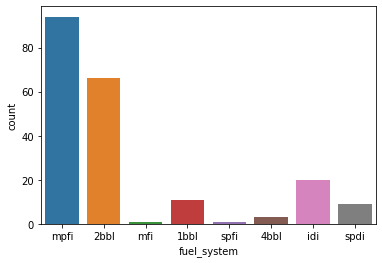

In [68]:
sns.countplot(x="fuel_system",data=data)

In [69]:
data.bore.describe()

count    201.000000
mean       3.329751
std        0.273539
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x19cc9047e20>,
 'caps': [<matplotlib.lines.Line2D at 0x19cc9056580>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cc9047a90>],
 'medians': [<matplotlib.lines.Line2D at 0x19cc9056ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cc9062070>],
 'means': []}

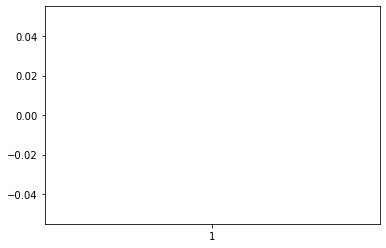

In [70]:
plt.boxplot(data.bore)

In [71]:
data.bore.fillna(data.bore.mean(),inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x19cc90b7850>,
 'caps': [<matplotlib.lines.Line2D at 0x19cc90b7f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cc90b7490>],
 'medians': [<matplotlib.lines.Line2D at 0x19cc90c16a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cc90c1a30>],
 'means': []}

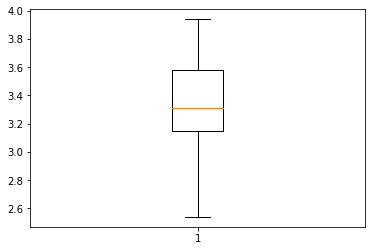

In [72]:
plt.boxplot(data.bore)

(array([ 1.,  1.,  8., 37., 40., 28., 27., 42., 17.,  4.]),
 array([2.54, 2.68, 2.82, 2.96, 3.1 , 3.24, 3.38, 3.52, 3.66, 3.8 , 3.94]),
 <BarContainer object of 10 artists>)

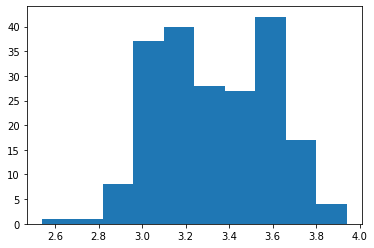

In [73]:
plt.hist(data.bore)

In [74]:
stats.shapiro(data.bore)

ShapiroResult(statistic=0.967185378074646, pvalue=0.00010421191109344363)

In [75]:
data.stroke.describe()

count    201.000000
mean       3.255423
std        0.316717
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x19cc91ab610>,
 'caps': [<matplotlib.lines.Line2D at 0x19cc91abd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cc91ab250>],
 'medians': [<matplotlib.lines.Line2D at 0x19cc91b6490>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cc91b6820>],
 'means': []}

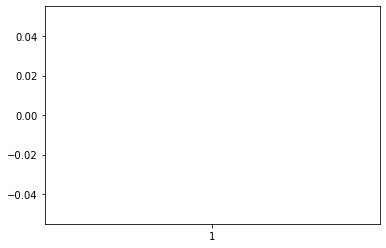

In [76]:
plt.boxplot(data.stroke)

In [77]:
data.stroke.fillna(data.stroke.median(),inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x19cc9215160>,
 'caps': [<matplotlib.lines.Line2D at 0x19cc9215970>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cc9204d90>],
 'medians': [<matplotlib.lines.Line2D at 0x19cc9215fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cc921f370>],
 'means': []}

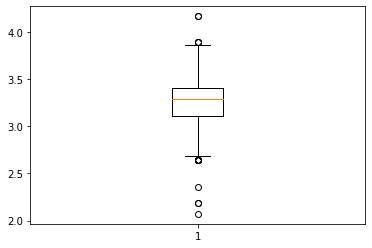

In [78]:
plt.boxplot(data.stroke)

(array([ 3.,  1., 13.,  7., 30., 56., 71., 15.,  7.,  2.]),
 array([2.07, 2.28, 2.49, 2.7 , 2.91, 3.12, 3.33, 3.54, 3.75, 3.96, 4.17]),
 <BarContainer object of 10 artists>)

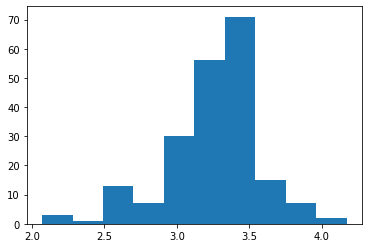

In [79]:
plt.hist(data.stroke)

In [80]:
stats.shapiro(data.stroke)

ShapiroResult(statistic=0.9372692704200745, pvalue=9.892903563013533e-08)

In [81]:
data.compression_ratio.describe()

count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: compression_ratio, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x19cc92e3b20>,
 'caps': [<matplotlib.lines.Line2D at 0x19cc92f1280>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cc92e3760>],
 'medians': [<matplotlib.lines.Line2D at 0x19cc92f19a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cc92f1d30>],
 'means': []}

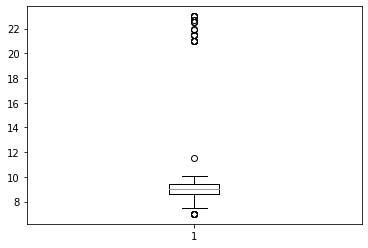

In [82]:
plt.boxplot(data.compression_ratio)

(array([ 51., 133.,   1.,   0.,   0.,   0.,   0.,   0.,   5.,  15.]),
 array([ 7. ,  8.6, 10.2, 11.8, 13.4, 15. , 16.6, 18.2, 19.8, 21.4, 23. ]),
 <BarContainer object of 10 artists>)

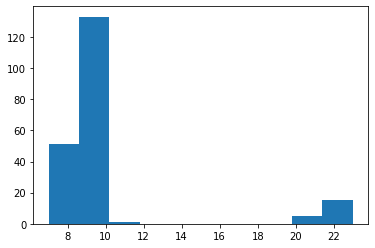

In [83]:
plt.hist(data.compression_ratio)

In [84]:
stats.shapiro(data.compression_ratio)

ShapiroResult(statistic=0.49774158000946045, pvalue=8.12114079238121e-24)

In [85]:
data.horsepower.describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x19cc93d46d0>,
 'caps': [<matplotlib.lines.Line2D at 0x19cc93d4df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cc93d4340>],
 'medians': [<matplotlib.lines.Line2D at 0x19cc93df580>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cc93df910>],
 'means': []}

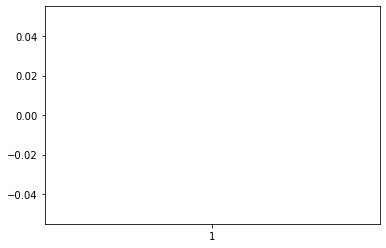

In [86]:
plt.boxplot(data.horsepower)

In [87]:
data.horsepower.fillna(data.horsepower.median(),inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x19cc9434a30>,
 'caps': [<matplotlib.lines.Line2D at 0x19cc9443190>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cc94346a0>],
 'medians': [<matplotlib.lines.Line2D at 0x19cc94438b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cc9443c40>],
 'means': []}

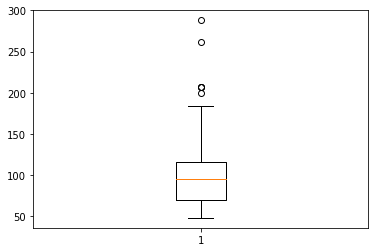

In [88]:
plt.boxplot(data.horsepower)


(array([55., 51., 49., 13., 23.,  8.,  4.,  0.,  1.,  1.]),
 array([ 48.,  72.,  96., 120., 144., 168., 192., 216., 240., 264., 288.]),
 <BarContainer object of 10 artists>)

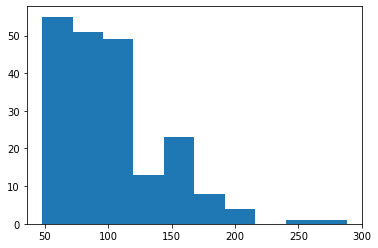

In [89]:
plt.hist(data.horsepower)

In [90]:
stats.shapiro(data.horsepower)

ShapiroResult(statistic=0.8840506672859192, pvalue=1.8387607408909545e-11)

In [91]:
data.peak_rpm.describe()

count     203.000000
mean     5125.369458
std       479.334560
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak_rpm, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x19cc950aaf0>,
 'caps': [<matplotlib.lines.Line2D at 0x19cc9519250>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cc950a760>],
 'medians': [<matplotlib.lines.Line2D at 0x19cc9519970>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cc9519d00>],
 'means': []}

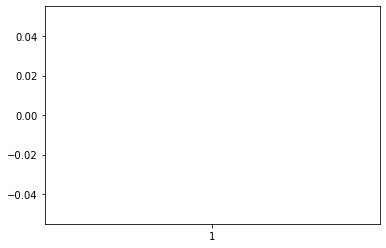

In [92]:
plt.boxplot(data.peak_rpm)

In [93]:
data.peak_rpm.fillna(data.peak_rpm.median(),inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x19cc957d520>,
 'caps': [<matplotlib.lines.Line2D at 0x19cc957dc40>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cc957d190>],
 'medians': [<matplotlib.lines.Line2D at 0x19cc95863a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cc9586730>],
 'means': []}

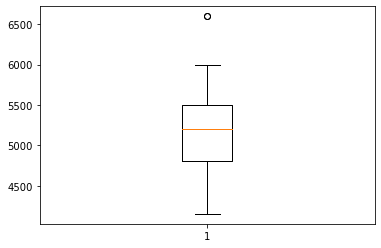

In [94]:
plt.boxplot(data.peak_rpm)


(array([17., 10., 41., 31., 33., 51.,  8., 12.,  0.,  2.]),
 array([4150., 4395., 4640., 4885., 5130., 5375., 5620., 5865., 6110.,
        6355., 6600.]),
 <BarContainer object of 10 artists>)

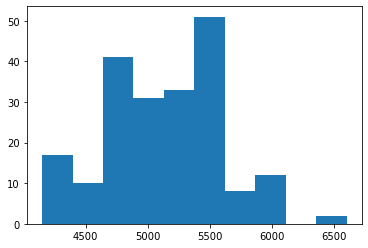

In [95]:
plt.hist(data.peak_rpm)

In [96]:
stats.shapiro(data.peak_rpm)

ShapiroResult(statistic=0.9701935648918152, pvalue=0.00024416492669843137)

In [97]:
data.city_mpg.describe()

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: city_mpg, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x19cc9644b20>,
 'caps': [<matplotlib.lines.Line2D at 0x19cc9651280>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cc9644790>],
 'medians': [<matplotlib.lines.Line2D at 0x19cc96519a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cc9651d30>],
 'means': []}

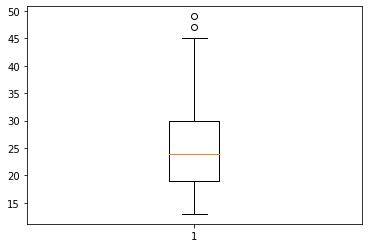

In [98]:
plt.boxplot(data.city_mpg)

(array([12., 46., 24., 56., 18., 31., 15.,  0.,  1.,  2.]),
 array([13. , 16.6, 20.2, 23.8, 27.4, 31. , 34.6, 38.2, 41.8, 45.4, 49. ]),
 <BarContainer object of 10 artists>)

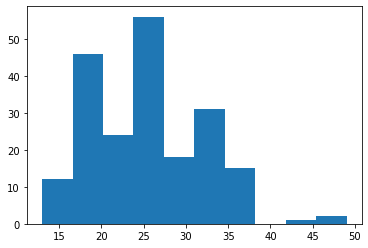

In [99]:
plt.hist(data.city_mpg)

In [100]:
stats.shapiro(data.city_mpg)

ShapiroResult(statistic=0.9572238922119141, pvalue=7.825866305211093e-06)

In [101]:
data.highway_mpg.describe()

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highway_mpg, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x19cc97266d0>,
 'caps': [<matplotlib.lines.Line2D at 0x19cc9726df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cc9726340>],
 'medians': [<matplotlib.lines.Line2D at 0x19cc9733550>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cc97338e0>],
 'means': []}

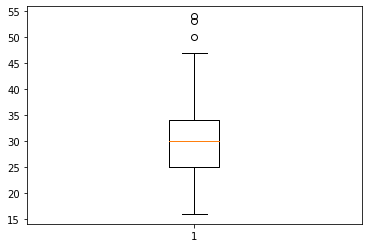

In [102]:
plt.boxplot(data.highway_mpg)

(array([ 7., 17., 44., 47., 39., 32.,  8.,  6.,  3.,  2.]),
 array([16. , 19.8, 23.6, 27.4, 31.2, 35. , 38.8, 42.6, 46.4, 50.2, 54. ]),
 <BarContainer object of 10 artists>)

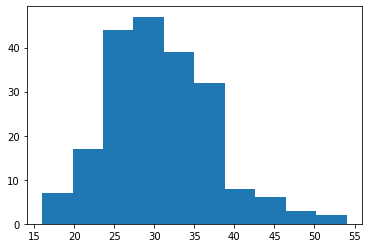

In [103]:
plt.hist(data.highway_mpg)

In [104]:
stats.shapiro(data.highway_mpg)

ShapiroResult(statistic=0.9735103845596313, pvalue=0.0006515368004329503)

In [105]:
data.price.describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x19cc9811880>,
 'caps': [<matplotlib.lines.Line2D at 0x19cc9811fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cc98114f0>],
 'medians': [<matplotlib.lines.Line2D at 0x19cc981d700>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cc981da90>],
 'means': []}

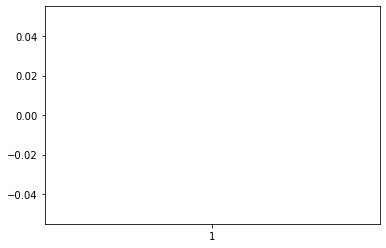

In [106]:
plt.boxplot(data.price)

In [107]:
data.price.fillna(data.price.median(),inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x19cc987d370>,
 'caps': [<matplotlib.lines.Line2D at 0x19cc987da90>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cc987d040>],
 'medians': [<matplotlib.lines.Line2D at 0x19cc98891f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cc9889580>],
 'means': []}

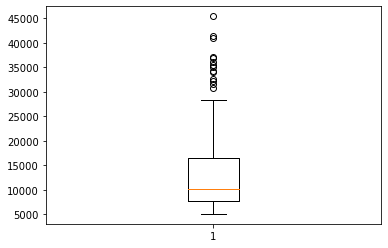

In [108]:
plt.boxplot(data.price)

In [109]:
stats.shapiro(data.price)

ShapiroResult(statistic=0.7954238057136536, pvalue=1.144922258705021e-15)

(array([81., 49., 35., 17.,  6.,  3.,  4.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <BarContainer object of 10 artists>)

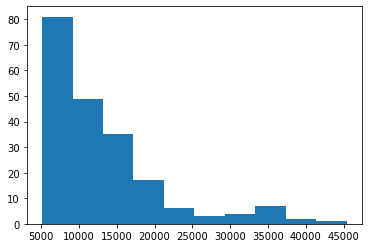

In [110]:
plt.hist(data.price)

<h2 style="color:green"> CORELATION COEFFICIENT </h2>

In [111]:
pearsonr(data.engine_size,data.price)

(0.8603427324326135, 2.5111938680510033e-61)

In [112]:
pearsonr(data.horsepower,data.price)

(0.7499191229023525, 2.7701494645429105e-38)

In [113]:
pearsonr(data.width,data.price)

(0.7245583242779026, 1.1789696449955338e-34)

In [114]:
pearsonr(data.curb_weight,data.price)

(0.819816683995632, 4.794551240414322e-51)

In [115]:
x=data[["horsepower","engine_size","width","curb_weight"]]

In [116]:
y=data.price

<h2 style="color:green"> SPLIT THE DATA IN TRAINING SET AND TEST SET </h2>

In [117]:
train_y=y.iloc[0:164]

In [118]:
test_y=y.iloc[164:]

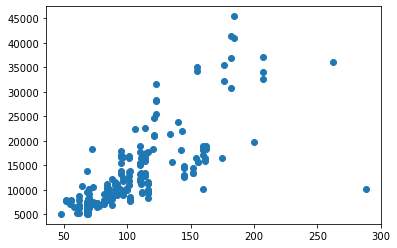

In [119]:
plt.scatter(data.horsepower,data.price)

In [120]:
train_x=x.iloc[0:164]
test_x=x.iloc[164:]
x=sm.add_constant(x)


D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [121]:
x.shape

(205, 5)

<h2 style="color:green"> EVALUATE THE MODEL</h2>

In [122]:
model=sm.OLS(train_y,train_x).fit()

In [123]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              600.2
Date:                Mon, 04 Apr 2022   Prob (F-statistic):                    3.46e-95
Time:                        11:16:46   Log-Likelihood:                         -1590.0
No. Observations:                 164   AIC:                                      3188.
Df Residuals:                     160   BIC:                                      3200.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
horsepower     24.1788     13.142      1.840      0.068      -1.776      50.134
engine_size   109.2414     15.589      7.008      0.000      78.456     140.027
width        -216.1136     28.255     -7.649      0.000    -271.914    -160.313
curb_weight     4.3960      1.187      3.702      0.000       2.051       6.741
==============================================================================
Omnibus:                       18.718   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.154
Skew:                          -0.005   Prob(JB):                     6.48e-18
Kurtosis:                       6.403   Cond. No.                         242.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h2 style="color:green"> PREDICT THE TEST</h2>

In [124]:
model.predict(test_x)

164     8255.687467
165     9539.351733
166     9693.211807
167    15742.773376
168    15725.189368
169    15791.129400
170    16353.817671
171    16507.677745
172    17655.034299
173    11405.442363
174    10312.133194
175    11792.290550
176    11792.290550
177    11985.714643
178    21024.671408
179    21200.511492
180    21844.494284
181    20840.000195
182     7637.629936
183     9517.834033
184     7650.817942
185     9531.022039
186     9807.970173
187     8279.458301
188    10280.551703
189    10117.495692
190    10015.650351
191    14756.255173
192     9119.859750
193    10843.995977
194    16437.739738
195    16974.051997
196    16538.847787
197    17009.220014
198    16981.333202
199    17473.685440
200    16246.186627
201    17806.433394
202    20489.247278
203    17654.662721
204    16729.746860
dtype: float64

In [125]:
test_price_predicted=model.predict(test_x)
plt.scatter(train_x.x,train_y.price,color="red")
plt.scatter(test_x.x,test_y.price,color="yellow")
plt.plot(test_x.x,test_y_predicted,color="green")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'x'

In [135]:
Q1=data.wheel_base.quantile(0.25)
Q3=data.wheel_base.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)

In [127]:
print(UE)
print(LE)

114.25000000000001
82.64999999999999


In [128]:
data[(data.wheel_base<UE)&(data.wheel_base>LE)]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,<0,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,<0,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,<0,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,<0,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [136]:
data.wheel_base[data.wheel_base>UE]=UE

C:\Users\bhava\AppData\Local\Temp/ipykernel_12852/736750420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.wheel_base[data.wheel_base>UE]=UE


In [137]:
data.wheel_base[data.wheel_base<LE]=LE

C:\Users\bhava\AppData\Local\Temp/ipykernel_12852/3201061370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.wheel_base[data.wheel_base<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x19ccb092970>,
 'caps': [<matplotlib.lines.Line2D at 0x19ccb0a00d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19ccb0925b0>],
 'medians': [<matplotlib.lines.Line2D at 0x19ccb0a07f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19ccb0a0b80>],
 'means': []}

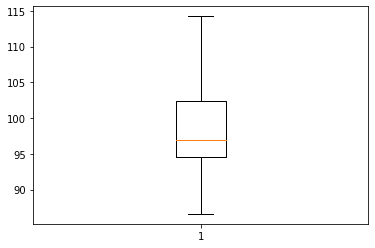

In [138]:
plt.boxplot(data.wheel_base)